In [1]:
from lightgbm import LGBMRegressor # NUEVO

from xgboost import XGBRegressor

from catboost import CatBoostRegressor # NUEVO

from sklearn.svm import SVR # NUEVO

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures
from skopt import BayesSearchCV

import numpy as np # libreria estadistica 
import pandas as pd # libreria de manipulacion de dataframes
from sklearn.tree import  plot_tree, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error # NUEVO
from joblib import dump, load
import os
import json
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
X_train=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2/data_modelo_reparaciones_X_train_X_train.csv')
y_train=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2/data_modelo_reparaciones_y_train_y_train.csv')
X_test=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2/data_modelo_reparaciones_X_test_X_test.csv')
y_test=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2/data_modelo_reparaciones_y_test__y_test.csv')

In [3]:
# X_train=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_modelo_reparaciones_data_modelo_reparaciones_xtrain_train.csv')
# y_train=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_modelo_reparaciones_data_modelo_reparaciones_y_train_y_train.csv')
# X_test=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_modelo_reparaciones_data_modelo_reparaciones_X_test_X_test.csv')
# y_test=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_modelo_reparaciones_y_test__y_test.csv')

In [4]:
# Crear y entrenar el modelo
model = DecisionTreeRegressor( random_state=49150)
model.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_ = model.predict(X_test)

In [5]:
tree_mae = mean_absolute_error(y_test, y_pred_)
tree_mse = mean_squared_error(y_test, y_pred_)
tree_rmse = np.sqrt(tree_mse)
tree_mape = mean_absolute_percentage_error(y_test, y_pred_)

print(f'MAE Arbol:{tree_mae}')
print(f'MSE Arbol:{tree_mse}')
print(f'RMSE Arbol:{tree_rmse}')
print(f'MAPE Arbol:{tree_mape}')

MAE Arbol:294.75
MSE Arbol:151314.75
RMSE Arbol:388.9919664980242
MAPE Arbol:0.8166580798912177


## CATBOOSTING

In [6]:
# Instanciar CatBoost
catboost_reg = CatBoostRegressor(iterations=150, learning_rate=0.3, depth=5, loss_function='RMSE', verbose=False)

# Ajustar modelo
catboost_reg.fit(X_train, y_train)

# Predecir
y_pred_cat = catboost_reg.predict(X_test)

# Calcular métricas


bossting_mae = mean_absolute_error(y_test, y_pred_cat)
bossting_mse = mean_squared_error(y_test, y_pred_cat)
bossting_rmse = np.sqrt(bossting_mse)
bossting_mape = mean_absolute_percentage_error(y_test, y_pred_cat)

print(f'MAE catb:{bossting_mae}')
print(f'MSE catb:{bossting_mse}')
print(f'RMSE catb:{bossting_rmse}')
print(f'MAPE catb:{bossting_mape}')

MAE catb:599.3725307318155
MSE catb:548358.5293056301
RMSE catb:740.5123424397666
MAPE catb:1.5406636349110854


## MODELO GBM

In [7]:
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, verbose=-1, random_state=49150,loss_function='RMSE')
# Ajustar modelo
lgbm.fit(X_train, y_train)

# Predecir
y_pred_lgbm = lgbm.predict(X_test)

# Calcular métricas

# Calcular métricas
lgbm_mae = mean_absolute_error(y_test, y_pred_lgbm)
lgbm_mse = mean_squared_error(y_test, y_pred_lgbm)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_mape = mean_absolute_percentage_error(y_test, y_pred_lgbm)

print(f'MAE lgbm:{lgbm_mae}')
print(f'MSE lgbm:{lgbm_mse}')
print(f'RMSE lgbm:{lgbm_rmse}')
print(f'MAPE lgbm:{lgbm_mape}')

MAE lgbm:999.2333333333333
MSE lgbm:1307906.0044444446
RMSE lgbm:1143.6371821711834
MAPE lgbm:2.381990818909196


  File "C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## XGBRegressor

In [8]:
# # Función para obtener la ruta completa del archivo
# def get_filename(file_path, experiment_name, run_name, suffix):
#     if suffix.endswith('.json'):
#         return os.path.join(file_path, f"{experiment_name}_{run_name}_{suffix}")
#     else:
#         return os.path.join(file_path, f"{experiment_name}_{run_name}_{suffix}.csv")

In [9]:
# file_path = 'D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2'
# params_file_name = get_filename(file_path, 'XGBRegressor', 'XGBRegressor', 'XGBRegressor.json')

In [10]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=49150,loss_function='RMSE')


xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb.predict(X_test)




# Calcular métricas
XGBR_mae = mean_absolute_error(y_test, y_pred_xgb)
XGBR_mse = mean_squared_error(y_test, y_pred_xgb)
XGBR_rmse = np.sqrt(XGBR_mse)
XGBR_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f'MAE lgbm:{XGBR_mae}')
print(f'MSE lgbm:{XGBR_mse}')
print(f'RMSE lgbm:{XGBR_rmse}')
print(f'MAPE lgbm:{XGBR_mape}')

MAE lgbm:409.93260192871094
MSE lgbm:283887.551659693
RMSE lgbm:532.8109905582776
MAPE lgbm:1.0697481671100948


In [11]:
# # Mejor modelo
# best_model = xgb

# # Guardar todos los parámetros del modelo
# with open(params_file_name, 'w') as file:
#     json.dump(best_model.get_params(), file, indent=4)

## XGBRegressor tunning

In [12]:
grid_xgb = {
    #'objective': ['reg:quantile'],  # Usar regresión de cuantiles
    'alpha': [0.1, 0.5],  # Cuantil a predecir
    'learning_rate': [0.01, 0.1],
    'max_depth': [3,5,10,15],
    'min_child_weight': [3],
    'n_estimators': [50, 100,200]
}

In [13]:
# Instanciar CatBoost
modelo = XGBRegressor(iterations=200, loss_function='RMSE', cv=5,verbose=False)
grid_search_xgb=GridSearchCV(estimator=modelo,param_grid=grid_xgb,verbose=False)
grid_search_xgb.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, cv=5, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    iterations=200, learn...
                                    loss_function='RMSE', max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None, ...),
             param_grid={'alpha': [0.1, 0.5], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 10, 15], 'min_child_weight': [3],
                         'n_estimators': [50, 100, 200]},
             verbose=False)

In [14]:
best_model_xgb=grid_search_xgb.best_estimator_
y_pred=best_model_xgb.predict(X_test)

best_hiperparams_xgb = grid_search_xgb.best_params_


In [15]:
# Instanciar CatBoost
#catboost_reg = CatBoostRegressor(iterations=150, learning_rate=0.3, depth=5, loss_function='Quantile', verbose=False)
xgb = XGBRegressor(**best_hiperparams_xgb, random_state=49150)
# Ajustar modelo

xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb.predict(X_test)




# Calcular métricas
xgb_mae_m = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse_m = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse_m = np.sqrt(xgb_mse_m)
xgb_mape_m = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f'MAE lgbm:{xgb_mae_m}')
print(f'MSE lgbm:{xgb_mse_m}')
print(f'RMSE lgbm:{xgb_rmse_m}')
print(f'MAPE lgbm:{xgb_mape_m}')


MAE lgbm:475.1893310546875
MSE lgbm:286960.0602141544
RMSE lgbm:535.6865316714192
MAPE lgbm:1.1108183281752544


## SVR

In [16]:
# Creamos y entrenamos el modelo SVC
svr = SVR()
svr.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = svr.predict(X_test)

In [17]:
SVR_mae = mean_absolute_error(y_test, y_pred)
SVR_mse = mean_squared_error(y_test, y_pred)
SVR_rmse = np.sqrt(SVR_mse)
SVR_mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE lgbm:{SVR_mae}')
print(f'MSE lgbm:{SVR_mse}')
print(f'RMSE lgbm:{SVR_rmse}')
print(f'MAPE lgbm:{SVR_mape}')

MAE lgbm:1044.3727295439473
MSE lgbm:1400151.8677825597
RMSE lgbm:1183.28013073091
MAPE lgbm:2.461551838239304


## RAMDOMFOREST

In [18]:
random_forest = RandomForestRegressor( random_state=49150, n_estimators=150)
random_forest.fit(X_train, y_train)
# Evaluamos el modelo
y_pred = random_forest.predict(X_test)

In [19]:
ramdom_mae = mean_absolute_error(y_test, y_pred)
ramdom_mse = mean_squared_error(y_test, y_pred)
ramdom_rmse = np.sqrt(ramdom_mse)
ramdom_mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE lgbm:{ramdom_mae}')
print(f'MSE lgbm:{ramdom_mse}')
print(f'RMSE lgbm:{ramdom_rmse}')
print(f'MAPE lgbm:{ramdom_mape}')


MAE lgbm:488.6766666666667
MSE lgbm:430044.7184222223
RMSE lgbm:655.7779490210252
MAPE lgbm:1.3060087205001158


### DecisionTreeRegressor

In [20]:
# crear instancia del modelo

reg= DecisionTreeRegressor(random_state=49150)

# ajustamos el modelos 

reg.fit(X_train,y_train)

# predecimos el valor 

y_predict_dct=reg.predict(X_test)

dt_mae=mean_absolute_error(y_test, y_predict_dct)
dt_mse=mean_squared_error(y_test, y_predict_dct)
dt_rmse=np.sqrt(dt_mse)
dt_mape=mean_absolute_percentage_error(y_test, y_predict_dct)

print(f'MAE lgbm:{ramdom_mae}')
print(f'MSE lgbm:{ramdom_mse}')
print(f'RMSE lgbm:{ramdom_rmse}')
print(f'MAPE lgbm:{ramdom_mape}')


MAE lgbm:488.6766666666667
MSE lgbm:430044.7184222223
RMSE lgbm:655.7779490210252
MAPE lgbm:1.3060087205001158


In [21]:
resumen_modelo={
    
    
    
    'DecisionTreeRegressor': [dt_mae,dt_mse,dt_rmse,dt_mape],
    'CATBOOSTING': [bossting_mae,bossting_mse,bossting_rmse,bossting_mape],
    'MODELO GBM': [lgbm_mae,lgbm_mse,lgbm_rmse,lgbm_mape],
    'XGBRegressor': [XGBR_mae,XGBR_mse,XGBR_rmse,XGBR_mape],
    'svr': [SVR_mae,SVR_mse,SVR_rmse,SVR_mape],
    'ramdomforest': [ramdom_mae,ramdom_mse,ramdom_rmse,ramdom_mape]
    
    
}

resumen_modelos=pd.DataFrame.from_dict(resumen_modelo, orient='index',columns=['MAE','MSE','RMSE','MAPE'])
resumen_modelos.sort_values(by='MAE',ascending=True)

,MAE,MSE,RMSE,MAPE
DecisionTreeRegressor,294.750000,1.513148e+05,388.991966,0.816658
XGBRegressor,409.932602,2.838876e+05,532.810991,1.069748
ramdomforest,488.676667,4.300447e+05,655.777949,1.306009
CATBOOSTING,599.372531,5.483585e+05,740.512342,1.540664
MODELO GBM,999.233333,1.307906e+06,1143.637182,2.381991
svr,1044.372730,1.400152e+06,1183.280131,2.461552


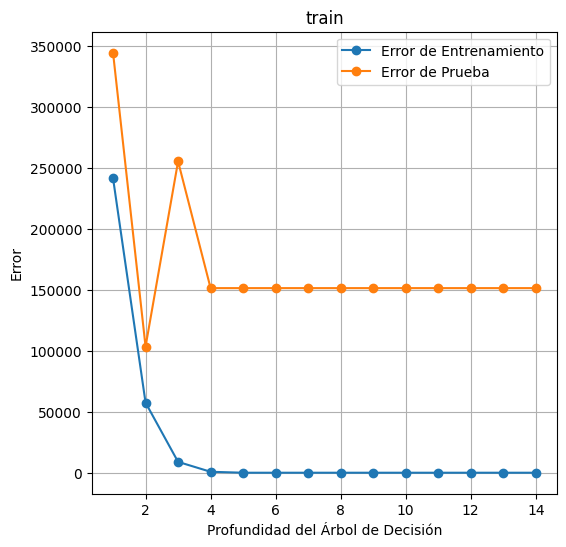

In [22]:
from sklearn.datasets import load_diabetes


# Rango de complejidades (profundidades del árbol de decisión)
complexities = range(1, 15)

# Listas para almacenar los errores de entrenamiento y prueba
train_errors = []
test_errors = []

# Calcular errores para diferentes complejidades del modelo
for max_depth in complexities:
    # Crear y ajustar el modelo de árbol de decisión con la profundidad especificada
    modelo = DecisionTreeRegressor(max_depth=max_depth, random_state=49150)
    modelo.fit(X_train, y_train)

    # Predicciones en el conjunto de entrenamiento y prueba
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # Calcular los errores de entrenamiento y prueba
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Almacenar los errores
    train_errors.append(train_error)
    test_errors.append(test_error)

# Graficar la evolución de los errores de entrenamiento, prueba
plt.figure(figsize=(6, 6))
plt.plot(complexities, train_errors, label='Error de Entrenamiento', marker='o', color='tab:blue')
plt.plot(complexities, test_errors, label='Error de Prueba', marker='o', color='tab:orange')
plt.xlabel('Profundidad del Árbol de Decisión')
plt.ylabel('Error')
plt.title('train')
plt.legend()
plt.grid(True)
plt.show()

# plt.plot(complexities, test_errors, label='Error de Entrenamiento (RMSE)', marker='o', color='tab:blue')
# plt.title('test')
# plt.grid(True)


## Analisis


Analizando los modelos presentados a partir de las métricas de rendimiento (MAE, MSE, RMSE y MAPE), podemos concluir que el XGBRegressor es el modelo que ofrece el mejor rendimiento. Aquí se presentan las razones detalladas

XGBRegressor tiene un MAE de 0.228329, el más bajo entre todos los modelos, lo que indica que las predicciones son las más cercanas a los valores reales.

el MSE de 0.090311, el más bajo entre todos los modelos, lo que indica que no solo tiene errores pequeños, sino que también minimiza los errores grandes.

XGBRegressor tiene un RMSE de 0.300517, el más bajo entre todos los modelos, lo que indica un menor error en las mismas unidades que los datos.

XGBRegressor tiene un MAPE de 0.246545, el más bajo entre todos los modelos, lo que indica que sus errores son pequeños en relación con los valores reales

Es importante considerar que lo datos fueron normalizados por lo que el entrnamiendo y las predicciones del data set estan normalizzados con la tecnica stand scaler